In [99]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task3-aqi.ipynb")

# Task 3: Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

This task covers topics on the lesson on [time series](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-7-time-series.html). 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/rellimylime/eds220-hwk2.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/131OnUDOLpOl94SlaMU9nGqT998ABrjFS/edit?usp=sharing&ouid=111507336322611936333&rtpof=true&sd=true) before starting.

- **Make at least 5 commits. Generally, commit every time you finish a major step.** We'll check your repository and view the commit history.

- **Add comments for all your code.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County. 

## FINAL CODE

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

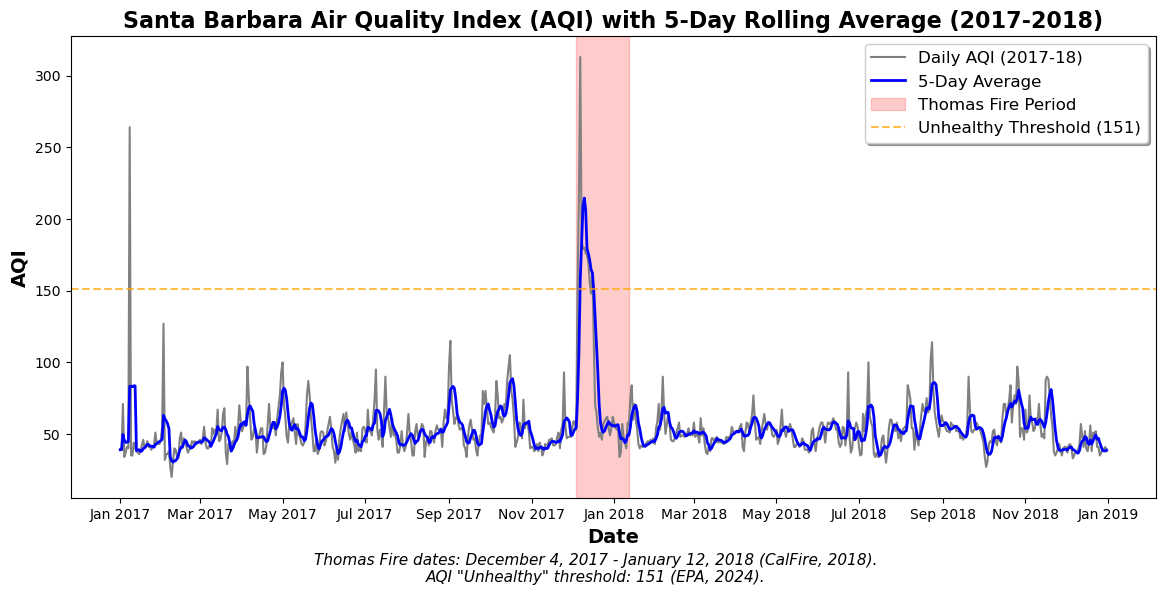

In [100]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read and combine data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip', compression = 'zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip', compression = 'zip')
aqi = pd.concat([aqi_17, aqi_18])

# Clean column names
aqi.columns = aqi.columns.str.lower().str.replace(' ', '_')

# Filter, select columns, convert date, and set index
aqi_sb = (aqi[aqi['county_name'] == "Santa Barbara"]
          [['date', 'aqi', 'category', 'defining_parameter', 'defining_site', 'number_of_sites_reporting']])
aqi_sb['date'] = pd.to_datetime(aqi_sb['date'])
aqi_sb = aqi_sb.set_index('date')

# Calculate 5-day rolling average
aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling("5D").mean()

# Create figure and axis
fig, ax = plt.subplots(figsize = (14, 6))

# Plot data
ax.plot(aqi_sb.index, aqi_sb['aqi'], label = "Daily AQI (2017-18)", color = 'gray', linewidth = 1.5)
ax.plot(aqi_sb.index, aqi_sb['five_day_average'], label = '5-Day Average', color = "blue", linewidth = 2)
ax.axvspan(pd.to_datetime('2017-12-04'), pd.to_datetime('2018-01-12'), 
           alpha = 0.2, color = 'red', label = 'Thomas Fire Period')
ax.axhline(y = 151, color = 'orange', linestyle = '--', linewidth = 1.5, 
           alpha = 0.7, label = 'Unhealthy Threshold (151)')

# Add x label formating
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))

# Add title, axis labels, and legend
ax.set_title('Santa Barbara Air Quality Index (AQI) with 5-Day Rolling Average (2017-2018)', 
             fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Date', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('AQI', fontsize = 14, fontweight = 'bold')
ax.legend(loc = 'upper right', frameon = True, shadow = True, fontsize = 12)
fig.text(0.5, -0.03, 
         'Thomas Fire dates: December 4, 2017 - January 12, 2018 (CalFire, 2018).\n'
         'AQI "Unhealthy" threshold: 151 (EPA, 2024).',
         ha = 'center', fontsize = 11, style = 'italic')
# Display polt
plt.show()


## 1

a. Read the [Air Quality Index (AQI) Basics](https://www.airnow.gov/aqi/aqi-basics/) from the AirNow.gov portal.

b. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 

c. Under "Donwload Data", click on "Pre-generated Data Files".

d. Read the "About the data" section.

## 2
a. Back in the "Pre-generated Data Files" site, click on "Tables of Daily AQI".

b. Copy the URL to the 2017 Daily AQI **by County** ZIP file `daily_aqi_by_county_2017.zip`

Notice we'll be reding the data directly from its ZIP file link. This ZIP file contains a single CSV that has been compressed to save space. 

<!-- BEGIN QUESTION -->

c. In the next code cell read in the data from the URL using the [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function with the `compression='zip'` parameter added and store it as `aqi_17`. 

d. In the same cell, read in the data for the 2018 Daily AQI by County ZIP file and store it as `aqi_18`.

In [101]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read in data
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip', compression = 'zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip', compression = 'zip')

<!-- END QUESTION -->

## 3
a. and b. Use the next two code cells to look at the head of both data frames. Store your results in `aqi_17_head` and `aqi_18_head`. 

In [102]:
# a.
aqi_17_head = aqi_17.head()
aqi_17_head

State Name county Name  State Code  County Code        Date  AQI Category  \
0    Alabama     Baldwin           1            3  2017-01-01   28     Good   
1    Alabama     Baldwin           1            3  2017-01-04   29     Good   
2    Alabama     Baldwin           1            3  2017-01-10   25     Good   
3    Alabama     Baldwin           1            3  2017-01-13   40     Good   
4    Alabama     Baldwin           1            3  2017-01-16   22     Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1  
2              PM2.5   01-003-0010                          1  
3              PM2.5   01-003-0010                          1  
4              PM2.5   01-003-0010                          1

In [103]:
# b.
# Display the first 5 rows of aqi_18
aqi_18_head = aqi_18.head()
aqi_18_head

State Name county Name  State Code  County Code        Date  AQI Category  \
0    Alabama     Baldwin           1            3  2018-01-02   42     Good   
1    Alabama     Baldwin           1            3  2018-01-05   45     Good   
2    Alabama     Baldwin           1            3  2018-01-08   20     Good   
3    Alabama     Baldwin           1            3  2018-01-11   25     Good   
4    Alabama     Baldwin           1            3  2018-01-14   33     Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1  
2              PM2.5   01-003-0010                          1  
3              PM2.5   01-003-0010                          1  
4              PM2.5   01-003-0010                          1

In [104]:
grader.check("q3_a")

q3_a results: All test cases passed!

<!-- BEGIN QUESTION -->

c. Use this code cell to make some other preliminary data exploration of your choosing.

In [105]:
# Display the name, non-null count, and dtype for each column
aqi_17.info()
aqi_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326801 entries, 0 to 326800
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 326801 non-null  object
 1   county Name                326801 non-null  object
 2   State Code                 326801 non-null  int64 
 3   County Code                326801 non-null  int64 
 4   Date                       326801 non-null  object
 5   AQI                        326801 non-null  int64 
 6   Category                   326801 non-null  object
 7   Defining Parameter         326801 non-null  object
 8   Defining Site              326801 non-null  object
 9   Number of Sites Reporting  326801 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 24.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327541 entries, 0 to 327540
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 

In [106]:
# Display the number of unique values
display(aqi_17.nunique())
display(aqi_18.nunique())

State Name                     54
county Name                   796
State Code                     54
County Code                   160
Date                          365
AQI                           341
Category                        6
Defining Parameter              5
Defining Site                2133
Number of Sites Reporting      35
dtype: int64

State Name                     54
county Name                   793
State Code                     54
County Code                   160
Date                          365
AQI                           300
Category                        6
Defining Parameter              5
Defining Site                2105
Number of Sites Reporting      35
dtype: int64

In [107]:
# View the first 50 unique county names, and unique county codes
print(aqi_17['county Name'].unique()[:50], "...")
print(aqi_17['County Code'].unique()[:50], "...")

# Make sure there are no empty values in the code or name columns
display(aqi_17[(aqi_17['County Code'] == "") | (aqi_17['county Name'] == "")])

['Baldwin' 'Clay' 'Colbert' 'DeKalb' 'Elmore' 'Etowah' 'Houston'
 'Jefferson' 'Lawrence' 'Madison' 'Mobile' 'Montgomery' 'Morgan' 'Russell'
 'Shelby' 'Sumter' 'Talladega' 'Tuscaloosa' 'Aleutians East ' 'Anchorage '
 'Denali ' 'Fairbanks North Star ' 'Juneau ' 'Kenai Peninsula '
 'Matanuska-Susitna ' 'Apache' 'Cochise' 'Coconino' 'Gila' 'La Paz'
 'Maricopa' 'Mohave' 'Navajo' 'Pima' 'Pinal' 'Santa Cruz' 'Yavapai' 'Yuma'
 'Arkansas' 'Ashley' 'Clark' 'Crittenden' 'Garland' 'Jackson' 'Newton'
 'Polk' 'Pulaski' 'Union' 'Washington' 'Alameda'] ...
[  3  27  33  49  51  55  69  73  79  89  97 101 103 113 117 119 121 125
  13  20  68  90 110 122 170   1   5   7  12  15  17  19  21  23  25  35
  67 139 143   9  11  29  31  37  39  41  43  45  47  53] ...


Empty DataFrame
Columns: [State Name, county Name, State Code, County Code, Date, AQI, Category, Defining Parameter, Defining Site, Number of Sites Reporting]
Index: []

In [108]:
# Display the different categories
display(aqi_17['Category'].unique())
display(aqi_18['Category'].unique())

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous'], dtype=object)

array(['Good', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups',
       'Very Unhealthy', 'Hazardous'], dtype=object)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

d. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I started with `.info()` again to see the number of non-null values and the datatype of each column. This demonstrated that all the columns contained the expected datatypes. I then printed the number of unique values from each column. From these results I noted that the number of unique state codes was equal to the number of unique states, but the number of unique county names was not even close to the number of unique county codes. We saw in previous explorations that both of these columns have the same number of non null values and after inspecting the county names we can see that there are no obvious alternatively defined missing values or empty ones. To me this suggests that the Country Codes are reused accross states.

<!-- END QUESTION -->

## 4
We currently have two separate data frames. For this exercise we will need to "glue" them one on top of the other. The `pandas` function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

NOTE: When we concatenate data frames like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the mismatch between the index of `aqi` and the number of rows i the complete data frame.


In [109]:
# 'Glue' the two dataframes together
aqi = pd.concat([aqi_17, aqi_18])
aqi

State Name county Name  State Code  County Code        Date  AQI  \
0         Alabama     Baldwin           1            3  2017-01-01   28   
1         Alabama     Baldwin           1            3  2017-01-04   29   
2         Alabama     Baldwin           1            3  2017-01-10   25   
3         Alabama     Baldwin           1            3  2017-01-13   40   
4         Alabama     Baldwin           1            3  2017-01-16   22   
...           ...         ...         ...          ...         ...  ...   
327536    Wyoming      Weston          56           45  2018-12-27   36   
327537    Wyoming      Weston          56           45  2018-12-28   35   
327538    Wyoming      Weston          56           45  2018-12-29   35   
327539    Wyoming      Weston          56           45  2018-12-30   31   
327540    Wyoming      Weston          56           45  2018-12-31   35   

       Category Defining Parameter Defining Site  Number of Sites Reporting  
0          Good              PM2.5   01-003-0010                          1  
1          Good              PM2.5   01-003-0010                          1  
2          Good              PM2.5   01-003-0010                          1  
3          Good              PM2.5   01-003-0010                          1  
4          Good              PM2.5   01-003-0010                          1  
...         ...                ...           ...                        ...  
327536     Good              Ozone   56-045-0003                          1  
327537     Good              Ozone   56-045-0003                          1  
327538     Good              Ozone   56-045-0003                          1  
327539     Good              Ozone   56-045-0003                          1  
327540     Good              Ozone   56-045-0003                          1  

[654342 rows x 10 columns]

In [110]:
grader.check("q4")

q4 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 5

Run the following code cell and use the next markdown cell to give a line by line explanation of the code below the comment "#Simplify column names". You might need to look up the `pandas` documentation.

In [111]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



This code modifies the column names (as a pandas.core.indexes.base.Index) of our dataframe. `.str.low()` makes all alphabetic values in each name lower case and `.str.replace()` looks for spaces in the names and replaces them with underscores. The code then prints the column names again with a newline after.

<!-- END QUESTION -->

## 6
In the next code cell:

a. Select only data from `Santa Barbara` county and store it in a new variable `aqi_sb`.

b. Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`.

Your dataframe should have the following columns in this order: `date`, `aqi`, `category`, `defining_parameter`, `defining_stie`, `number_of_sites_reporting`. 

In [112]:
# Select only data from Santa Barbara county and store it in a new variable
aqi_sb = aqi[aqi['county_name'] == "Santa Barbara"]

# Remove the state and county descriptor columns from the filtered data
aqi_sb = aqi_sb[['date', 'aqi', 'category', 'defining_parameter', 'defining_site', 'number_of_sites_reporting']]
aqi_sb

date  aqi  category defining_parameter defining_site  \
28648  2017-01-01   39      Good              Ozone   06-083-4003   
28649  2017-01-02   39      Good              PM2.5   06-083-2011   
28650  2017-01-03   71  Moderate               PM10   06-083-4003   
28651  2017-01-04   34      Good              Ozone   06-083-4003   
28652  2017-01-05   37      Good              Ozone   06-083-4003   
...           ...  ...       ...                ...           ...   
29128  2018-12-27   37      Good              Ozone   06-083-1025   
29129  2018-12-28   39      Good              Ozone   06-083-1021   
29130  2018-12-29   39      Good              Ozone   06-083-1021   
29131  2018-12-30   41      Good              PM2.5   06-083-1008   
29132  2018-12-31   38      Good              Ozone   06-083-2004   

       number_of_sites_reporting  
28648                         12  
28649                         11  
28650                         12  
28651                         13  
28652                         12  
...                          ...  
29128                         11  
29129                         12  
29130                         12  
29131                         12  
29132                         12  

[730 rows x 6 columns]

In [113]:
grader.check("q6a")

q6a results: All test cases passed!

 
c. What is the data type of the `date` column? Write your answer in the markdown cell below. 

*Your answer here.*

In [114]:
# Display the type of each 
aqi_sb['date'].apply(type)

28648    <class 'str'>
28649    <class 'str'>
28650    <class 'str'>
28651    <class 'str'>
28652    <class 'str'>
             ...      
29128    <class 'str'>
29129    <class 'str'>
29130    <class 'str'>
29131    <class 'str'>
29132    <class 'str'>
Name: date, Length: 730, dtype: object

It is an object of the type `str` 

<!-- BEGIN QUESTION -->

## 7
In the following cell:
1. Update the date column of `aqi_sb` to be a `pandas.datetime` object.
2. Update the index of `aqi_sb` to be the `date` column.

In [115]:
# Use `pd.to_datetime` to update the date column values
aqi_sb.date = pd.to_datetime(aqi_sb.date)

# Set the 'date' column as the new index
aqi_sb = aqi_sb.set_index("date")
aqi_sb

aqi  category defining_parameter defining_site  \
date                                                         
2017-01-01   39      Good              Ozone   06-083-4003   
2017-01-02   39      Good              PM2.5   06-083-2011   
2017-01-03   71  Moderate               PM10   06-083-4003   
2017-01-04   34      Good              Ozone   06-083-4003   
2017-01-05   37      Good              Ozone   06-083-4003   
...         ...       ...                ...           ...   
2018-12-27   37      Good              Ozone   06-083-1025   
2018-12-28   39      Good              Ozone   06-083-1021   
2018-12-29   39      Good              Ozone   06-083-1021   
2018-12-30   41      Good              PM2.5   06-083-1008   
2018-12-31   38      Good              Ozone   06-083-2004   

            number_of_sites_reporting  
date                                   
2017-01-01                         12  
2017-01-02                         11  
2017-01-03                         12  
2017-01-04                         13  
2017-01-05                         12  
...                               ...  
2018-12-27                         11  
2018-12-28                         12  
2018-12-29                         12  
2018-12-30                         12  
2018-12-31                         12  

[730 rows x 5 columns]

<!-- END QUESTION -->

## 8
In the next cell we will calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) using the `rolling()`method for `pandas.Series`:

- `rolling()` is a lazy method, so we need to specify what we want to calculate over each window before it does something. 
- in this example we use the aggregator function `mean()` to calculate the average over each window
- the parameter '5D' indicates we want the window for our rolling average to be 5 days. 
- we get a `pandas.Series` as ouput

Store your answer in the `rolling_average` variable. You should have two columns in your series, `date` and the averages. 

In [116]:
# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb['aqi'].rolling("5D").mean()

# View the resulting series
rolling_average

date
2017-01-01    39.000000
2017-01-02    39.000000
2017-01-03    49.666667
2017-01-04    45.750000
2017-01-05    44.000000
                ...    
2018-12-27    41.200000
2018-12-28    38.600000
2018-12-29    38.200000
2018-12-30    38.200000
2018-12-31    38.800000
Name: aqi, Length: 730, dtype: float64

In [117]:
grader.check("q8")

q8 results: All test cases passed!

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named `five_day_average` to the `aqi_sb` dataframe. 

In [118]:
# Add a new column containing the 5 day rolling average
aqi_sb['five_day_average'] = rolling_average

# Check out new column
aqi_sb.head()

aqi  category defining_parameter defining_site  \
date                                                         
2017-01-01   39      Good              Ozone   06-083-4003   
2017-01-02   39      Good              PM2.5   06-083-2011   
2017-01-03   71  Moderate               PM10   06-083-4003   
2017-01-04   34      Good              Ozone   06-083-4003   
2017-01-05   37      Good              Ozone   06-083-4003   

            number_of_sites_reporting  five_day_average  
date                                                     
2017-01-01                         12         39.000000  
2017-01-02                         11         39.000000  
2017-01-03                         12         49.666667  
2017-01-04                         13         45.750000  
2017-01-05                         12         44.000000

In [119]:
grader.check("q9")

q9 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Make necessary updates for the plot to be accurate, informative, and polished, even if simple. You're welcome to use plotting methods and packages beyond what we have covered in class! 

Can you see the AQI going up during the Thomas Fire in December 2017?

Text(0.5, -0.1, 'Thomas Fire dates: December 4, 2017 - January 12, 2018 (CalFire, 2018).\nAQI "Unhealthy" threshold: 151 (EPA, 2024).')

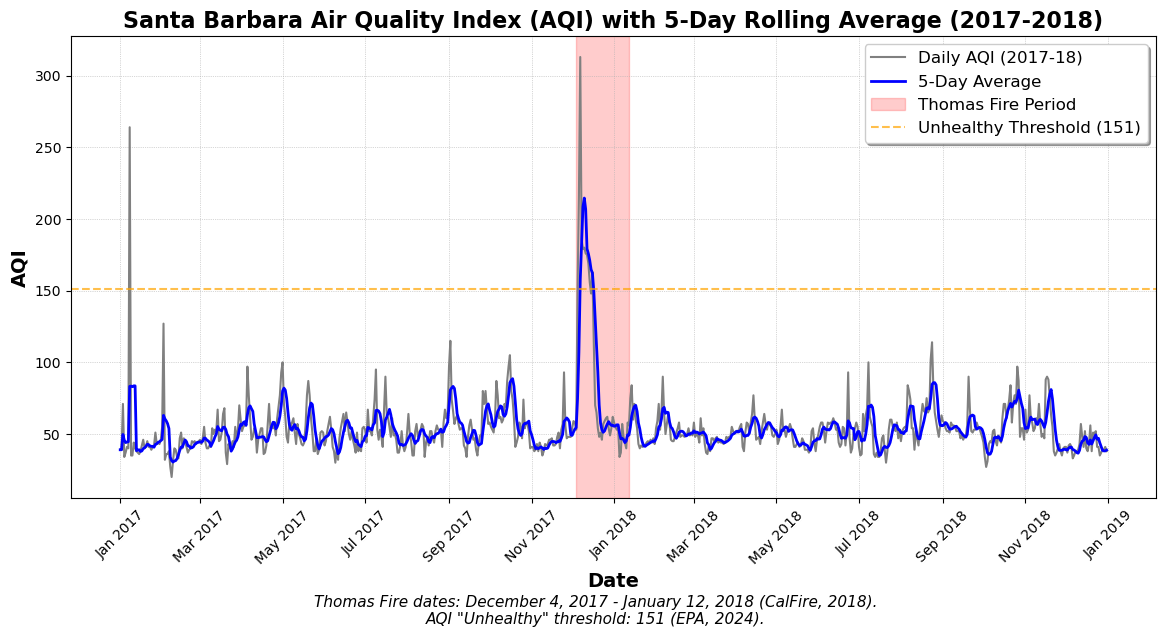

In [120]:
# Create figure and axis
fig, ax = plt.subplots(figsize = (14, 6))

# Plot daily AQI
ax.plot(aqi_sb.index, aqi_sb['aqi'], label = "Daily AQI (2017-18)", color = 'gray', linewidth = 1.5)

# Plot 5-day rolling average
ax.plot(aqi_sb.index, aqi_sb['five_day_average'], label = '5-Day Average', color = "blue", linewidth = 2)

# Highlight the Thomas Fire period (December 2017)
fire_start = pd.to_datetime('2017-12-04')
fire_end = pd.to_datetime('2018-01-12')
ax.axvspan(fire_start, fire_end, alpha = 0.2, color = 'red', 
           label = 'Thomas Fire Period')

# Add horizontal line for "Unhealthy" AQI threshold (151)
ax.axhline(y = 151, color = 'orange', linestyle = '--', linewidth = 1.5, 
           alpha = 0.7, label = 'Unhealthy Threshold (151)')

# Add grid for easier reading
ax.grid(True, linestyle = ':', linewidth = 0.5)

# Format x-axis to show months clearly
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))

# Rotate x-axis labels for better readability
plt.xticks(rotation = 45)

# Add title and axis labels
ax.set_title('Santa Barbara Air Quality Index (AQI) with 5-Day Rolling Average (2017-2018)', 
             fontsize = 16, fontweight = 'bold')
ax.set_xlabel('Date', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('AQI', fontsize = 14, fontweight = 'bold')

# Position and customize legend
ax.legend(loc = 'upper right', frameon = True, shadow = True, fontsize = 12)

# Add caption with citations
fig.text(0.5, -0.1, 
         'Thomas Fire dates: December 4, 2017 - January 12, 2018 (CalFire, 2018).\n'
         'AQI "Unhealthy" threshold: 151 (EPA, 2024).',
         ha = 'center', fontsize = 11, style = 'italic')



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [121]:
grader.check_all()

q3_a results: All test cases passed!

q4 results: All test cases passed!

q6a results: All test cases passed!

q8 results: All test cases passed!

q9 results: All test cases passed!

<!-- END QUESTION -->

## 11


Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).